
# 📊 Kinetics Dataset Inspection

This notebook helps you **verify the dataset setup** by:
1. Counting how many video files are present (recursively).
2. Showing an inline preview of **one** video from the dataset.

> **Default dataset path:** `Video-Colorization/data/dataset` (assuming this notebook is inside  `Video-Colorization/notebooks/` folder).  
> Adjust the `DATASET_DIR` below if your path differs.


# Dataset -Kinetics400 Subset

The dataset used for this project is the subset of [Kinetics400](https://github.com/UF-EEE6778-Fall25/Video-Colorization) subset. The Kinteics400 dataset is a huge dataset developed by Google contains large set of Human action short video clips. There are multiple versions of Kinetics Dataset differing the size, 400/600/700. Each version have different subsets, in each subset the videos are divded to parts. For this project first 10 parts of the subset is used

---
```bash
Kinetics400
|-- subset_1
|    |__ part_0.tar.gz
|    |__ part_1.tar.gz
|    | ........
|-- subset_2
|    |__ part_0.tar.gz
|    |__ part_1.tar.gz
|    | ........
```

-  Each video is of ~10 - 20sec of different human actions in various complaex backgrounds.
-  The ``src/download_kinetics_dataset.py`` will download 10 parts(part_01 to part_09) from subset_1 which has total of 11,000 short video clips of varied resolutions.
-  This daatset is futher preprocessed and used for model training for Video Colorization.


In [4]:

from pathlib import Path

# 🔧 Configure your dataset directory here
# If you run this from your project's 'notebooks/' folder, the default should work.
DATASET_DIR = Path("../data/dataset")

# Common video extensions to search for
VIDEO_EXTS = {".mp4", ".avi", ".mov", ".mkv", ".webm", ".mpg", ".mpeg"}

print(f"Dataset directory set to: {DATASET_DIR.resolve()}")
if not DATASET_DIR.exists():
    print("⚠️ The dataset directory does not exist. Please check the path above.")


Dataset directory set to: C:\Users\Santhic_311\Documents\Courses\Applied ML II\Video-Colorization\data\dataset


In [5]:

from collections import defaultdict
import pandas as pd

def iter_videos(root: Path):
    for p in root.rglob("*"):
        if p.is_file() and p.suffix.lower() in VIDEO_EXTS:
            yield p

video_paths = list(iter_videos(DATASET_DIR))
total_videos = len(video_paths)
print(f"✅ Found {total_videos} video(s) in {DATASET_DIR} (recursive).")

# Build a small summary table by top-level class (first subfolder under DATASET_DIR)
by_class = defaultdict(int)
for vp in video_paths:
    try:
        # Relative parts from DATASET_DIR; pick the first directory name as 'class'
        rel = vp.relative_to(DATASET_DIR)
        cls = rel.parts[0] if len(rel.parts) > 1 else "(root)"
    except Exception:
        cls = "(unknown)"
    by_class[cls] += 1

df = pd.DataFrame(sorted(by_class.items(), key=lambda x: x[0]), columns=["Class/Folder", "Num Videos"])
display(df)
print("\nClasses/Folders counted:", len(df))


✅ Found 11000 video(s) in ..\data\dataset (recursive).


,Class/Folder,Num Videos
0,(root),11000



Classes/Folders counted: 1


In [6]:

from IPython.display import Video, display, HTML

if len(video_paths) == 0:
    print("⚠️ No videos found to preview. Make sure you've extracted archives to the dataset directory.")
else:
    sample_video = str(video_paths[0])
    print(f"▶️ Previewing: {sample_video}")
    try:
        # Try embedding the video directly
        display(Video(sample_video, embed=True))
    except Exception as e:
        print("Inline video preview failed in this environment. Error:", e)
        print("As a fallback, here is a simple HTML5 video tag preview (may not always work):")
        display(HTML(f'<video src="{sample_video}" controls width="640"></video>'))


▶️ Previewing: ..\data\dataset\---QUuC4vJs_000084_000094.mp4


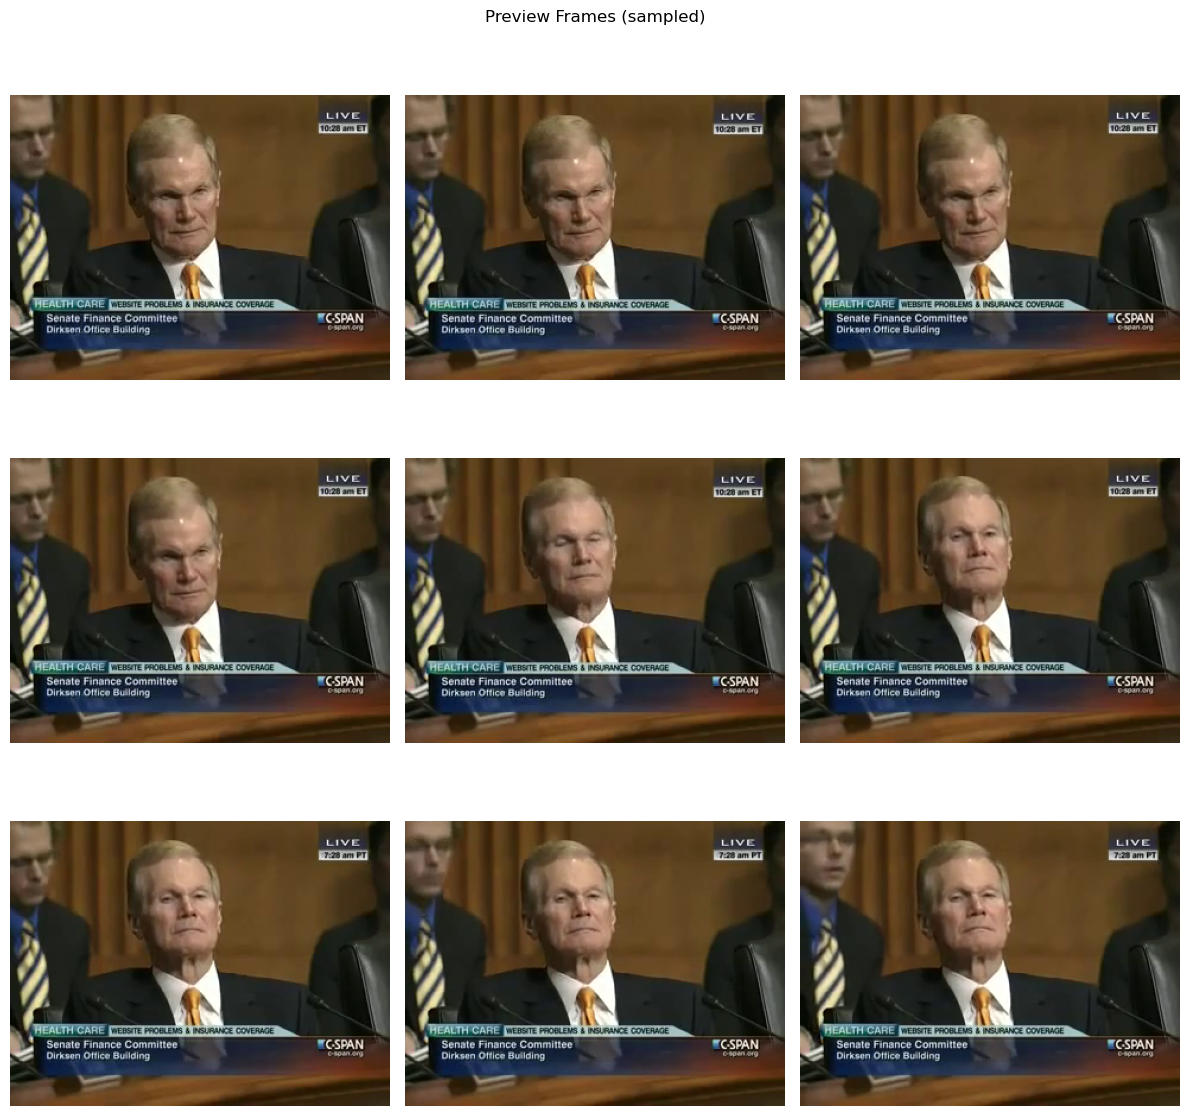

In [7]:
# Show a grid of the first few frames using OpenCV + matplotlib
try:
    import cv2
    import math
    import matplotlib.pyplot as plt

    if len(video_paths) > 0:
        cap = cv2.VideoCapture(str(video_paths[0]))
        frames_to_show = 9  # number of frames to display
        grabbed_frames = []
        success, frame = cap.read()
        count = 0
        while success and len(grabbed_frames) < frames_to_show:
            # Sample every Nth frame to spread out preview
            if count % 10 == 0:
                # Convert BGR (OpenCV) -> RGB (matplotlib)
                grabbed_frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            success, frame = cap.read()
            count += 1
        cap.release()

        if grabbed_frames:
            cols = 3
            rows = math.ceil(len(grabbed_frames) / cols)
            plt.figure(figsize=(12, 4 * rows))
            for i, fr in enumerate(grabbed_frames, 1):
                plt.subplot(rows, cols, i)
                plt.imshow(fr)
                plt.axis('off')
            plt.suptitle("Preview Frames (sampled)")
            plt.tight_layout()
            plt.show()
        else:
            print("Could not grab frames from the sample video (it may be empty or corrupted).")
except Exception as e:
    print("Frame visualization fallback skipped due to error:", e)
